In [1]:
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation, metrics  
from sklearn.grid_search import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor

/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
df = pd.read_csv("../data/feature_1.csv",sep=',')
df.head()
df['timestamp'] = df.timestamp.apply(lambda x: pd.to_datetime(x))
df.set_index('timestamp',inplace=True,drop=True)

In [8]:
df.head()

,value,label,weekday,day,hour,minute,timestamp_int,pre_1minute,pre_2minute,pre_3minute,pre_4minute,pre_5minute,pre_1day
timestamp,,,,,,,,,,,,,
2017-05-08 04:06:00,2.508197,0,1,8,4,6,1494187560,2.737705,2.918033,3.032787,2.786885,2.918033,2.344262
2017-05-08 04:07:00,2.885246,0,1,8,4,7,1494187620,2.508197,2.737705,2.918033,3.032787,2.786885,2.344262
2017-05-08 04:08:00,2.803279,0,1,8,4,8,1494187680,2.885246,2.508197,2.737705,2.918033,3.032787,2.524590
2017-05-08 04:09:00,2.868852,0,1,8,4,9,1494187740,2.803279,2.885246,2.508197,2.737705,2.918033,2.409836
2017-05-08 04:10:00,2.770492,0,1,8,4,10,1494187800,2.868852,2.803279,2.885246,2.508197,2.737705,2.606557


In [9]:
feature_df = df.drop(['value','label'],axis=1)
feature_df.head()

,weekday,day,hour,minute,timestamp_int,pre_1minute,pre_2minute,pre_3minute,pre_4minute,pre_5minute,pre_1day
timestamp,,,,,,,,,,,
2017-05-08 04:06:00,1,8,4,6,1494187560,2.737705,2.918033,3.032787,2.786885,2.918033,2.344262
2017-05-08 04:07:00,1,8,4,7,1494187620,2.508197,2.737705,2.918033,3.032787,2.786885,2.344262
2017-05-08 04:08:00,1,8,4,8,1494187680,2.885246,2.508197,2.737705,2.918033,3.032787,2.524590
2017-05-08 04:09:00,1,8,4,9,1494187740,2.803279,2.885246,2.508197,2.737705,2.918033,2.409836
2017-05-08 04:10:00,1,8,4,10,1494187800,2.868852,2.803279,2.885246,2.508197,2.737705,2.606557


In [20]:
x_train = feature_df[:67*24*60]
x_test = feature_df[67*24*60:]
y_train = df.value[:67*24*60]
y_test = df.value[67*24*60:]

In [28]:
gbdt = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
gbdt.fit(x_train,y_train)
pred = gbdt.predict(x_test)

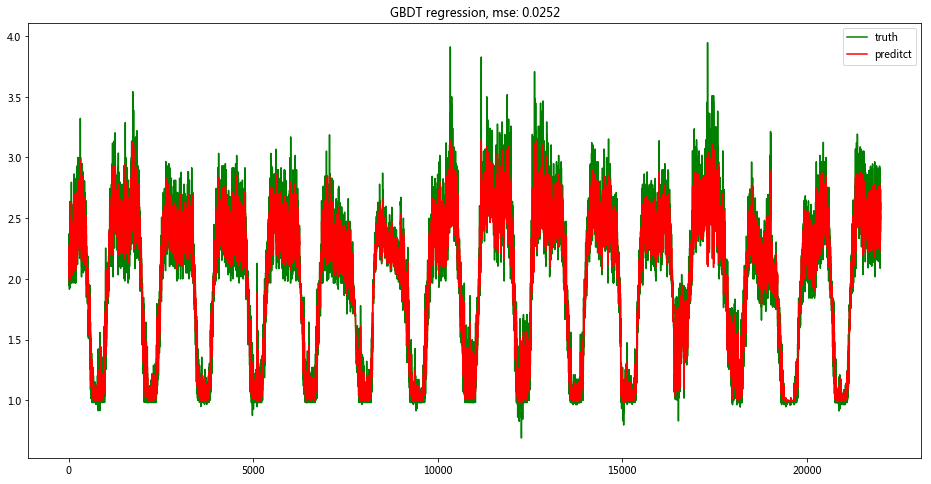

In [22]:
plt.figure(figsize=(16,8))
plt.plot(y_test.values,color='green',label='truth')
plt.plot(pred,color='red',label='preditct')
plt.legend(loc='best')
plt.title('GBDT regression, mse: %.4f'%mean_squared_error(y_test.values,pred))
plt.show()

In [19]:
print(mean_squared_error(y_test.values,pred))
gbdt.feature_importances_

0.0252868767343


array([ 0.05766557,  0.04485871,  0.12583117,  0.01347404,  0.08129619,
        0.28257037,  0.07561765,  0.10406465,  0.05433748,  0.1228914 ,
        0.03739277])

In [26]:
gbdt_base = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
gbdt_base.fit(x_train[['weekday','hour','minute']],y_train)
base_pred = gbdt_base.predict(x_test[['weekday','hour','minute']])

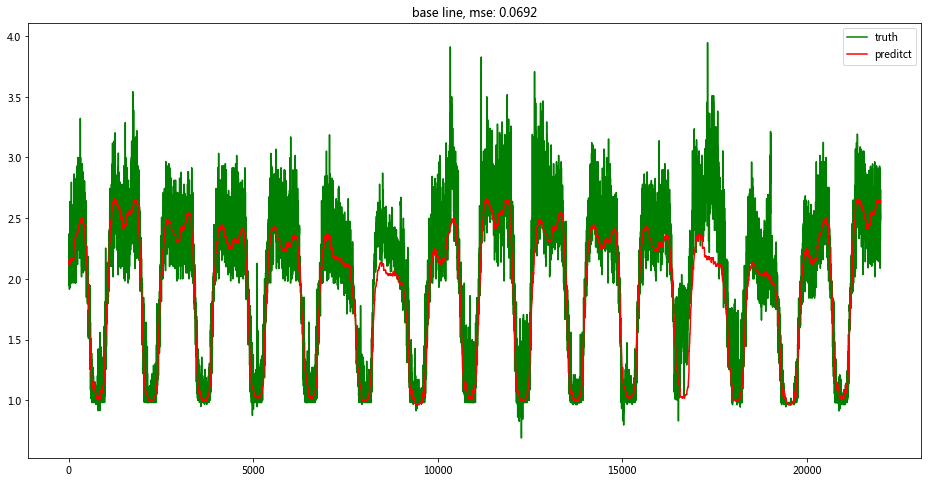

In [31]:
plt.figure(figsize=(16,8))
plt.plot(y_test.values,color='green',label='truth')
plt.plot(base_pred,color='red',label='preditct')
plt.legend(loc='best')
plt.title('base line, mse: %.4f'%mean_squared_error(y_test.values,base_pred))
plt.show()